In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('/Users/USER/3D Objects/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# M stands for Malignant and B for Benign

In [3]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,569.0,NaN,NaN,NaN,30371831.432337,125020585.612224,8670.0,869218.0,906024.0,8813129.0,911320502.0
diagnosis,569,2,B,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,569.0,NaN,NaN,NaN,14.127292,3.524049,6.981,11.7,13.37,15.78,28.11
texture_mean,569.0,NaN,NaN,NaN,19.289649,4.301036,9.71,16.17,18.84,21.8,39.28
perimeter_mean,569.0,NaN,NaN,NaN,91.969033,24.298981,43.79,75.17,86.24,104.1,188.5
area_mean,569.0,NaN,NaN,NaN,654.889104,351.914129,143.5,420.3,551.1,782.7,2501.0
smoothness_mean,569.0,NaN,NaN,NaN,0.09636,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569.0,NaN,NaN,NaN,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569.0,NaN,NaN,NaN,0.088799,0.07972,0.0,0.02956,0.06154,0.1307,0.4268
concave points_mean,569.0,NaN,NaN,NaN,0.048919,0.038803,0.0,0.02031,0.0335,0.074,0.2012


In [5]:
df.shape


(569, 33)

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# converting categorical to numerical using LabelEncoder

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
labelencoder_Y = LabelEncoder()
df.diagnosis = labelencoder_Y.fit_transform(df.diagnosis)

In [13]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [23]:
x = df.drop(columns=['diagnosis', 'Unnamed: 32'], axis=1)
y = df['diagnosis']

In [24]:
x


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


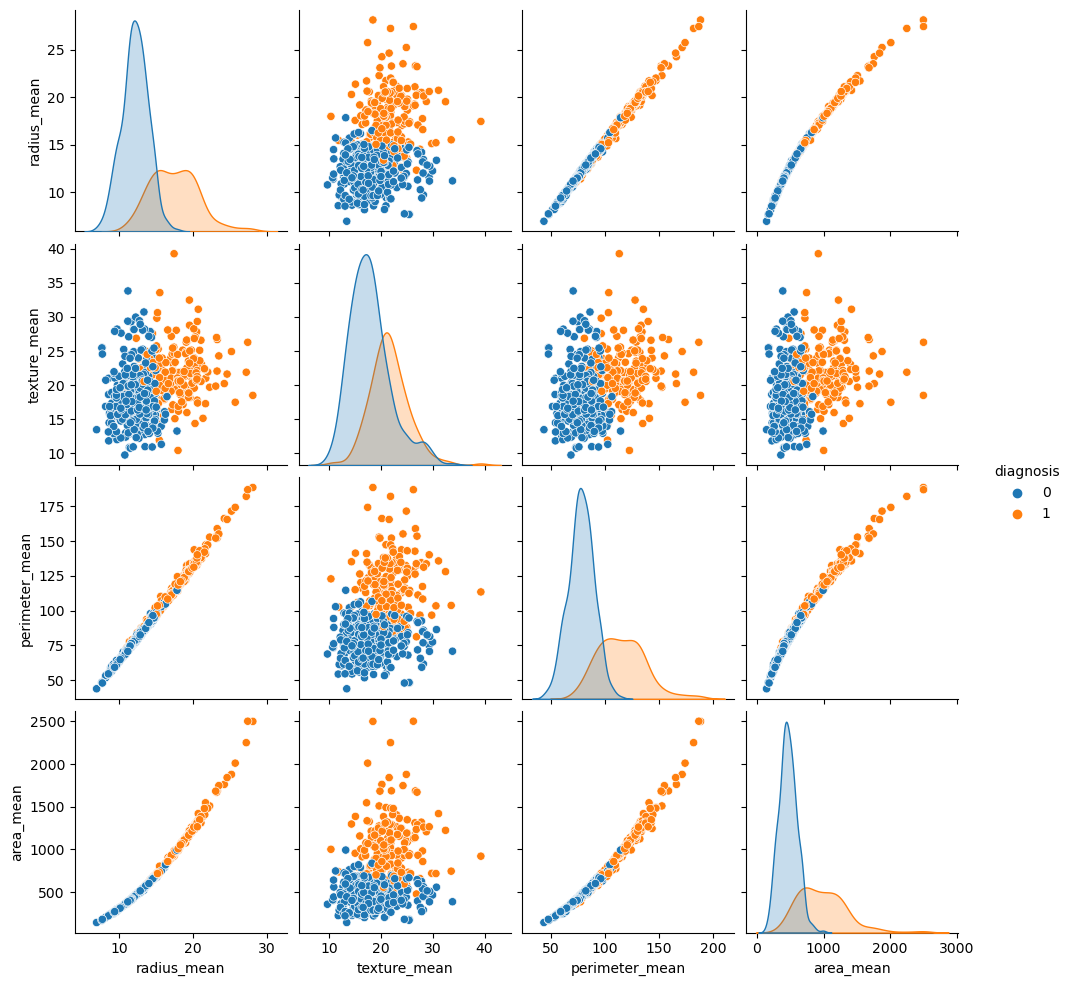

In [25]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(df[cols], hue="diagnosis")
plt.show()

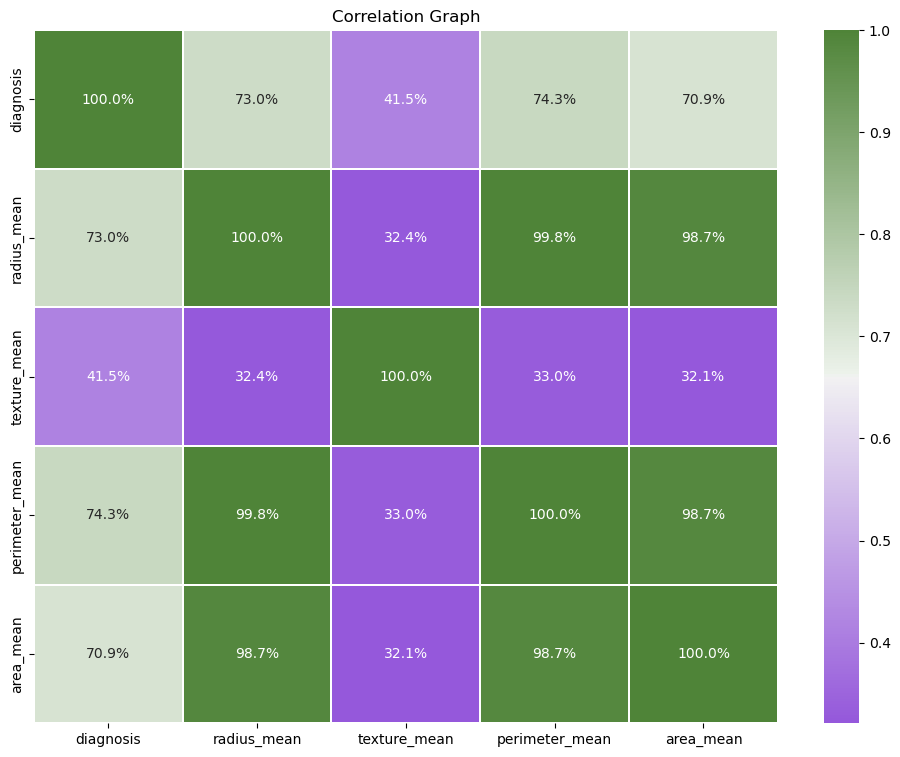

In [58]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(df[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

# standard scaling

In [19]:
scaler = StandardScaler()

In [26]:
scaler.fit(x)

StandardScaler()

In [28]:
std_data = scaler.transform(x)
x = std_data

In [29]:
x

array([[-0.23640517,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.23640344,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.24240586, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# train and test data

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [35]:
x_train.shape

(455, 31)

In [37]:
x_test.shape

(114, 31)

# training the model using SVC

In [38]:
clf = svm.SVC(kernel='linear')  

In [39]:
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [40]:
x_train_pred = clf.predict(x_train)
accuracy_score(x_train_pred,y_train)

0.989010989010989

# Accuracy on test data


In [41]:
x_test_pred = clf.predict(x_test)
accuracy_score(x_test_pred,y_test)

0.9385964912280702

In [50]:
input_sample = (842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.36010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,
               153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,0.1622,0.6656,0.7119,0.11890,0.123,0.234,
               0.234)
input_np_array = np.asarray(input_sample)

In [52]:
input_np_array_reshaped = input_np_array.reshape(1, -1)

In [53]:
std_data = scaler.transform(input_np_array_reshaped)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [54]:
std_data

array([[-0.23640517,  1.09706398, -2.07333501,  1.26993369,  0.9843749 ,
         1.56846633,  3.28351467,  3.40617225,  2.53247522,  2.21751501,
         2.25574689,  2.48973393, -0.56526506,  2.83303087,  2.48757756,
        -0.21400165,  1.31686157,  0.72402616,  0.66081994,  1.14875667,
         0.90708308,  1.88668963, -1.35929347,  2.30360062, -1.54770314,
        23.37467398,  2.91119771, -0.73540511,  0.12780866, -0.90717972,
         8.3153752 ]])

In [55]:
prediction = clf.predict(std_data)
prediction

array([1], dtype=int64)

In [57]:
if (prediction[0]==0):
    print('Person is in Benign Stage')
else:
    print('Person is in Malignant Stage')

Person is in Malignant Stage
